## Timetable Scheduler
Objective: To maximize productivity in a day. <br><br>Given a schedule and a list of tasks, the Pulp module calculates and assign tasks such that it factors in the priority score of each tasks. Each time block is 30 minutes. 


In [40]:
import pandas as pd
from pulp import *
import numpy as np
import matplotlib.pyplot as plt


tasks = pd.read_csv('tasks.csv')
schedule = pd.read_csv('schedule.csv')['Availability']


# Input parameters:

$s_i$: important score of task $i$

$d_i$: number of time blocks needed to finish task $i$

$b_t$: availability of time block \; $b \in \{0,1\}  $

$B$: total number of time blocks 

$n$: total number of tasks

In [32]:
s = list(tasks['Priority (1-5)'])
d = list(tasks['Num of blocks'])
b = list(schedule)

B = len(b)
n = len(s)

In [33]:
# Available time blocks
A = sum(b)

In [34]:
prob = LpProblem("Schedule_Tasks",LpMaximize)

#Define variable
y = LpVariable.dicts('Block', [(i,t) for i in range(n) for t in range(B)],
                    cat='Binary')

## Objective function
$\text{Maximize} \;\; \sum_{i=1}^{n}\sum_{t=1}^{B} s_{i}y_{it}$

$y_{it}$ = 1 if task $i$ is assigned to time $t$, 0 otherwise

In [35]:
#Define objective
prob += lpSum(s[i]*b[t]*y[(i,t)] for i in range(n) for t in range(B))

# Constraints:

Sum of the time blocks of the assigned tasks should be not greater than the number of available time blocks

$\sum_{i=1}^{n}\sum_{t=1}^{B} y_{it} \leq A$ (1) 

Total number of time blocks assigned for each task should not be greater than the time needed to finish the task

$\sum_{t=1}^{B} y_{it} \leq d_i \;; \forall i = 1, 2, ..., n$ (2)

No more than one task each block

$\sum_{i=1}^{n} y_{it} \leq 1 \;; \forall t = 1, 2, ..., B$ (3)

In [36]:
prob += lpSum(y[(i,t)] for i in range(n) for t in range(B)) <= A #1

for i in range(n):
    prob += lpSum(y[(i,t)] for t in range(B)) <= d[i] #2

for t in range(B):
    prob += lpSum(y[(i,t)] for i in range(n)) <= 1 #3



In [37]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/huijee/Python/chatbot1/env/lib/python3.7/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/d1/dvr261d924ldmypwmkhsl2_80000gn/T/c3b54e7ea2ba4e0cacf5b4b49c705c0e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/d1/dvr261d924ldmypwmkhsl2_80000gn/T/c3b54e7ea2ba4e0cacf5b4b49c705c0e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 63 COLUMNS
At line 2386 RHS
At line 2445 BOUNDS
At line 2878 ENDATA
Problem MODEL has 58 rows, 432 columns and 1296 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 52 - 0.00 seconds
Cgl0004I processed model has 28 rows, 162 columns (162 integer (162 of which binary)) and 486 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -52
Cbc

1

In [41]:
tasks = np.zeros((n,B))
chosen_tasks = []

for i in range(n):
    for t in range(B):
        tasks[i][t]= y[(i,t)].varValue*(i+1)
        if y[(i,t)].varValue == 1:
            if i+1 not in chosen_tasks:
                chosen_tasks.append(i+1)
        
print('Chosen tasks are: {}'.format(chosen_tasks))



Assignment accomplished!
Chosen tasks are: [2, 3, 4, 5, 6, 7, 9]


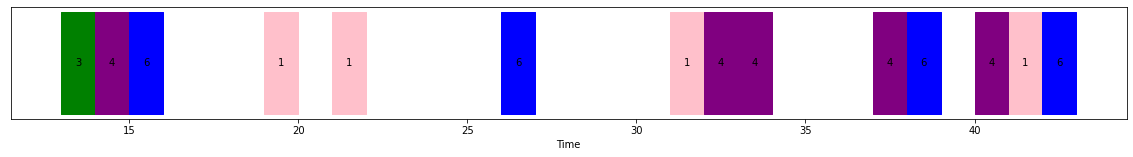

In [42]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.axes.get_yaxis().set_visible(False)
ax.set_aspect(1)

def avg(a, b):
    return (a + b) / 2.0
    
for y, row in enumerate(tasks):
    for x, col in enumerate(row):
        x1 = [x, x+1]
        y1 = [0, 0]
        y2 = [3, 3]
            
        if col == 1:
            plt.fill_between(x1, y1, y2=y2, color='red')
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "0",
                    horizontalalignment='center', verticalalignment='center')
        
        if col == 2 :
            plt.fill_between(x1, y1, y2=y2, color='pink')
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "1",
                    horizontalalignment='center', verticalalignment='center')

        if col == 4:
            plt.fill_between(x1, y1, y2=y2, color='green')
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "3",
                    horizontalalignment='center', verticalalignment='center')

        if col == 5:
            plt.fill_between(x1, y1, y2=y2, color='purple')
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "4",
                    horizontalalignment='center', verticalalignment='center')
            
        if col == 7:
            plt.fill_between(x1, y1, y2=y2, color='blue')
            plt.text(avg(x1[0], x1[1]), avg(y1[0],y2[0]), "6",
                    horizontalalignment='center', verticalalignment='center')
        
            
ax.set_xlabel('Time')
plt.show()

        
        
        